In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets.samples_generator import make_blobs
from sklearn. preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, f1_score, precision_recall_curve
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif,mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel,SelectKBest,SelectPercentile
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler  


In [24]:
#loading data file
#dataset source: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
fullFileName='dataset/winequalityred.csv'
df=pd.read_csv(fullFileName, sep=';', header=0)



In [25]:
#first we count the number of missing values in each row in pandas dataframe
df.isnull().sum(axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
print("Dataset Lenght:: ",len(df))
print("Dataset shape:: ", df.shape)

Dataset Lenght::  1599
Dataset shape::  (1599, 12)


In [27]:
print("Dataset:: ")
df.head()
df.info()
df.describe()

Dataset:: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


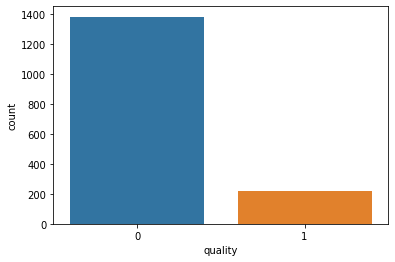

In [28]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

#assign a labels to our quality variable
label_quality = LabelEncoder()

#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

df['quality'].value_counts()

sns.countplot(df['quality'])

In [29]:
#Creating the Source and Target Variables
data=df.values
X1 = data[:,0:-1] 
Y = data[:,-1]

In [30]:
""" MIN MAX SCALER """
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
X2 = min_max_scaler.fit_transform(X1) 
  
""" Standardisation """ 
Standardisation = preprocessing.StandardScaler() 
# Scaled feature 
X = Standardisation.fit_transform(X2) 

#Spliting Dataset into Test and Train
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2, random_state=0)



In [31]:
###remove constant,
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [32]:
##duplicate features
X_train_T=X_train_filter.T
X_test_T=X_test_filter.T

In [33]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [34]:
X_train_T.duplicated().sum()

0

In [35]:
####we have duplicate features here
duplicated_features=X_train_T.duplicated()

In [36]:
features_to_keep=[not index for index in duplicated_features]

In [37]:
X_train_=X_train_T[features_to_keep].T
X_test_=X_test_T[features_to_keep].T

In [38]:
X_train_.shape,X_test_.shape

((1279, 11), (320, 11))

In [39]:
# Decision Tree clasification
#Function to perform training with Entropy
dt=DecisionTreeClassifier(criterion="entropy", random_state=0)
dt.fit(X_train_, y_train)
y_pred_en=dt.predict(X_test_)

In [40]:
#checking performance of the model
print(confusion_matrix(y_test, y_pred_en))
print(classification_report(y_test, y_pred_en))
f1_score(y_test, y_pred_en,average='weighted')

[[270  20]
 [ 10  20]]
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       290
         1.0       0.50      0.67      0.57        30

    accuracy                           0.91       320
   macro avg       0.73      0.80      0.76       320
weighted avg       0.92      0.91      0.91       320



0.9121240601503761

In [41]:
#using random forest
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_, y_train)
predictionRF=rfc.predict(X_test_)
#checking performance of the model
print(confusion_matrix(y_test, predictionRF))
print(classification_report(y_test, predictionRF))
f1_score(y_test, predictionRF,average='weighted')

[[280  10]
 [ 14  16]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       290
         1.0       0.62      0.53      0.57        30

    accuracy                           0.93       320
   macro avg       0.78      0.75      0.77       320
weighted avg       0.92      0.93      0.92       320



0.9225782778864972

In [42]:
#define K
import math
math.sqrt(len(y_test))

17.88854381999832

In [43]:
#K-NN classifier
knn=KNeighborsClassifier(n_neighbors=17, p=2, metric='euclidean')

#predict the test set results
knn.fit(X_train_, y_train)
predictionKNN=knn.predict(X_test_)
#Evaluate model
print(confusion_matrix(y_test, predictionKNN))
print(classification_report(y_test, predictionKNN))
f1_score(y_test, predictionKNN,average='weighted')

[[275  15]
 [ 19  11]]
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       290
         1.0       0.42      0.37      0.39        30

    accuracy                           0.89       320
   macro avg       0.68      0.66      0.67       320
weighted avg       0.89      0.89      0.89       320



0.8903192270058709

In [44]:
# svm Classifier
clf=svm.SVC(kernel="rbf", C=1)
clf.fit(X_train_,y_train)
predictionSVM=clf.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionSVM))
print(classification_report(y_test, predictionSVM))
f1_score(y_test, predictionSVM,average='weighted')

[[285   5]
 [ 21   9]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       290
         1.0       0.64      0.30      0.41        30

    accuracy                           0.92       320
   macro avg       0.79      0.64      0.68       320
weighted avg       0.90      0.92      0.91       320



C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9050678767541184

In [45]:
#Bagging Classifier
bg=BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=1.0, n_estimators=20)
#bg=BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=1.0, n_estimators=30)
bg.fit(X_train_,y_train)
predictionbg=bg.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionbg))
print(classification_report(y_test, predictionbg))
f1_score(y_test, predictionbg,average='weighted')

[[277  13]
 [ 12  18]]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       290
         1.0       0.58      0.60      0.59        30

    accuracy                           0.92       320
   macro avg       0.77      0.78      0.77       320
weighted avg       0.92      0.92      0.92       320



0.9224479033947734

In [46]:
#Boosting Classifier- Ada Boost
adb=AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10, learning_rate=1)
adb.fit(X_train_,y_train)
predictionadb=adb.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionadb))
print(classification_report(y_test, predictionadb))
f1_score(y_test, predictionadb,average='weighted')

[[264  26]
 [  7  23]]
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94       290
         1.0       0.47      0.77      0.58        30

    accuracy                           0.90       320
   macro avg       0.72      0.84      0.76       320
weighted avg       0.93      0.90      0.91       320



0.907529784065525

In [47]:
#Naive bayse Classifier
nb=GaussianNB()
nb.fit(X_train_,y_train)
predictionnb=nb.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionnb))
print(classification_report(y_test, predictionnb))
f1_score(y_test, predictionnb,average='weighted')

[[240  50]
 [  6  24]]
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90       290
         1.0       0.32      0.80      0.46        30

    accuracy                           0.82       320
   macro avg       0.65      0.81      0.68       320
weighted avg       0.91      0.82      0.85       320



0.8548363949483354

In [48]:
#creat Multilayer neural network Classifier
nn=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train_,y_train)
predictionNN=nn.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionNN))
print(classification_report(y_test, predictionNN))
f1_score(y_test, predictionNN,average='weighted')

[[268  22]
 [ 17  13]]
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       290
         1.0       0.37      0.43      0.40        30

    accuracy                           0.88       320
   macro avg       0.66      0.68      0.67       320
weighted avg       0.89      0.88      0.88       320



0.8822826086956523

In [49]:
#voting Classifier- Multiple Model Ensemble
evc=VotingClassifier(estimators=[('dt',dt),('rfc',rfc),('clf',clf),('knn',knn),('bg',bg),('adb',adb),('nb',nb),('nn',nn)], voting='hard')
evc.fit(X_train_,y_train)
predictionevc=evc.predict(X_test_)

#Evaluate model
print(confusion_matrix(y_test, predictionevc))
print(classification_report(y_test, predictionevc))
f1_score(y_test, predictionevc,average='weighted', )

C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[282   8]
 [ 17  13]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       290
         1.0       0.62      0.43      0.51        30

    accuracy                           0.92       320
   macro avg       0.78      0.70      0.73       320
weighted avg       0.91      0.92      0.92       320



0.9155784979526616

In [50]:
#defining learning classifiers
names=["Decision_Tree", "Random_Forest", "linear_SVM","Nearest_Neighbors","Bagging","AdaBoost","Naive_Bayes","Neural_Net","Vothing_classifier"]
classifiers = [dt,rfc,clf,knn,bg,adb,nb,nn,evc]

In [51]:
#Build Model, Apply Model on Test Data & Record Accuracy Scores
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_, y_train)
    prediction=clf.predict(X_test_)
    score=f1_score(y_test, prediction,average='weighted')
    scores.append(score)

C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SARA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [52]:
scores

[0.9121240601503761,
 0.9328168727994945,
 0.9050678767541184,
 0.8903192270058709,
 0.9186577311577313,
 0.9123564046965468,
 0.8548363949483354,
 0.8822826086956523,
 0.9290859382802357]

In [56]:
#create data frame of model performance
wine = pd.DataFrame()
wine['Machine Learning algorithms'] = names
wine['F-measure of Wine Quality'] = scores
wine

,Machine Learning algorithms,F-measure of Wine Quality
0,Decision_Tree,0.912124
1,Random_Forest,0.932817
2,linear_SVM,0.905068
3,Nearest_Neighbors,0.890319
4,Bagging,0.918658
5,AdaBoost,0.912356
6,Naive_Bayes,0.854836
7,Neural_Net,0.882283
8,Vothing_classifier,0.929086


In [59]:
#adding colors to the data frame
cm = sns.light_palette("maroon", as_cmap=True)
s = wine.style.background_gradient(cmap=cm)
s

,Machine Learning algorithms,F-measure of Wine Quality
0,Decision_Tree,0.912124
1,Random_Forest,0.932817
2,linear_SVM,0.905068
3,Nearest_Neighbors,0.890319
4,Bagging,0.918658
5,AdaBoost,0.912356
6,Naive_Bayes,0.854836
7,Neural_Net,0.882283
8,Vothing_classifier,0.929086


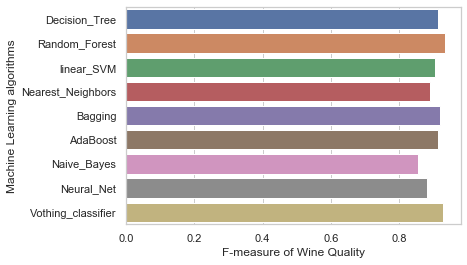

In [60]:
#Bar plot of model performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Machine Learning algorithms", x="F-measure of Wine Quality", data=wine)